# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_5_TRAIN.csv")
df_train

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,6.0,4.0,0.1,0.1,0.125,0.1,0.5,0.5,0.057913,0.057913,0.717489,0.909384,1.457327,1.594712,0.070230,0.139359
1,6.0,4.0,0.1,0.1,0.125,0.1,0.5,0.5,0.069369,0.069369,0.731038,0.919773,1.481772,1.609344,0.071832,0.141162
2,6.0,4.0,0.1,0.1,0.125,0.1,0.5,0.5,0.080826,0.080826,0.747326,0.933105,1.510842,1.629002,0.073750,0.143535
3,6.0,4.0,0.1,0.1,0.125,0.1,0.5,0.5,0.092282,0.092282,0.765641,0.948827,1.544031,1.652741,0.075916,0.146274
4,6.0,4.0,0.1,0.1,0.125,0.1,0.5,0.5,0.103739,0.103739,0.785474,0.966459,1.579594,1.679265,0.078285,0.149321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20303995,10000.0,10.0,10.0,0.5,10.000,0.5,5.0,0.5,1.467061,1.467061,0.901101,0.901101,0.018448,0.018448,0.272504,0.272504
20303996,10000.0,10.0,10.0,0.5,10.000,0.5,5.0,0.5,1.478518,1.478518,0.886602,0.886602,0.017609,0.017609,0.268121,0.268121
20303997,10000.0,10.0,10.0,0.5,10.000,0.5,5.0,0.5,1.489974,1.489974,0.874514,0.874514,0.016895,0.016895,0.264487,0.264487
20303998,10000.0,10.0,10.0,0.5,10.000,0.5,5.0,0.5,1.501431,1.501431,0.864790,0.864790,0.016294,0.016294,0.261574,0.261574


In [3]:
# Get unique combinations of the first four columns
CC_combinations = df_train.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

158625


In [4]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [  2.4   2.6   2.8   3.6   4.    5.2   5.8   6.4   7.   10.   12.   20.
  30.   40.  100. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [0.5 1.  1.5 2.  3.  5. ]
Different b/t values:  [0.5]


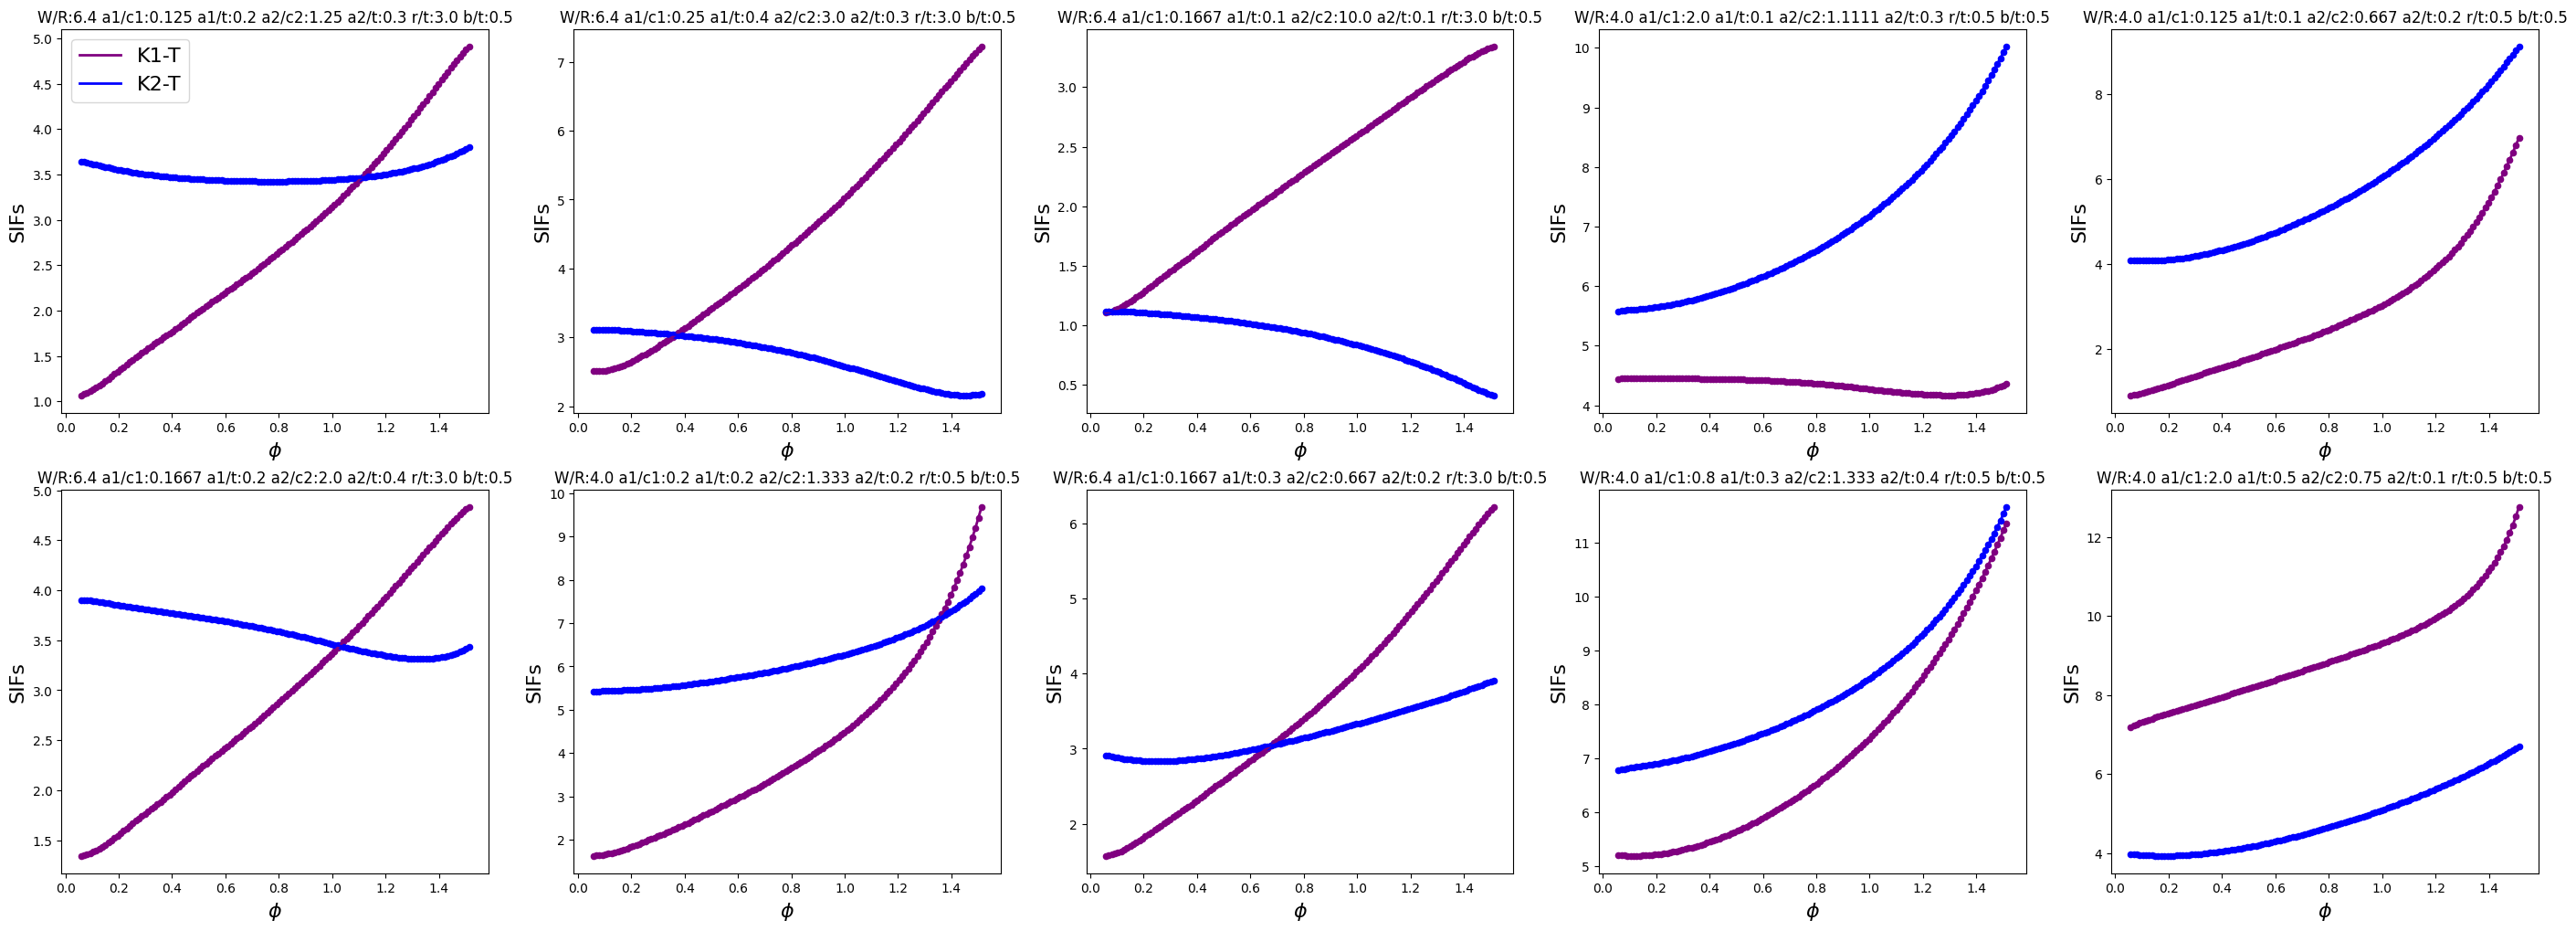

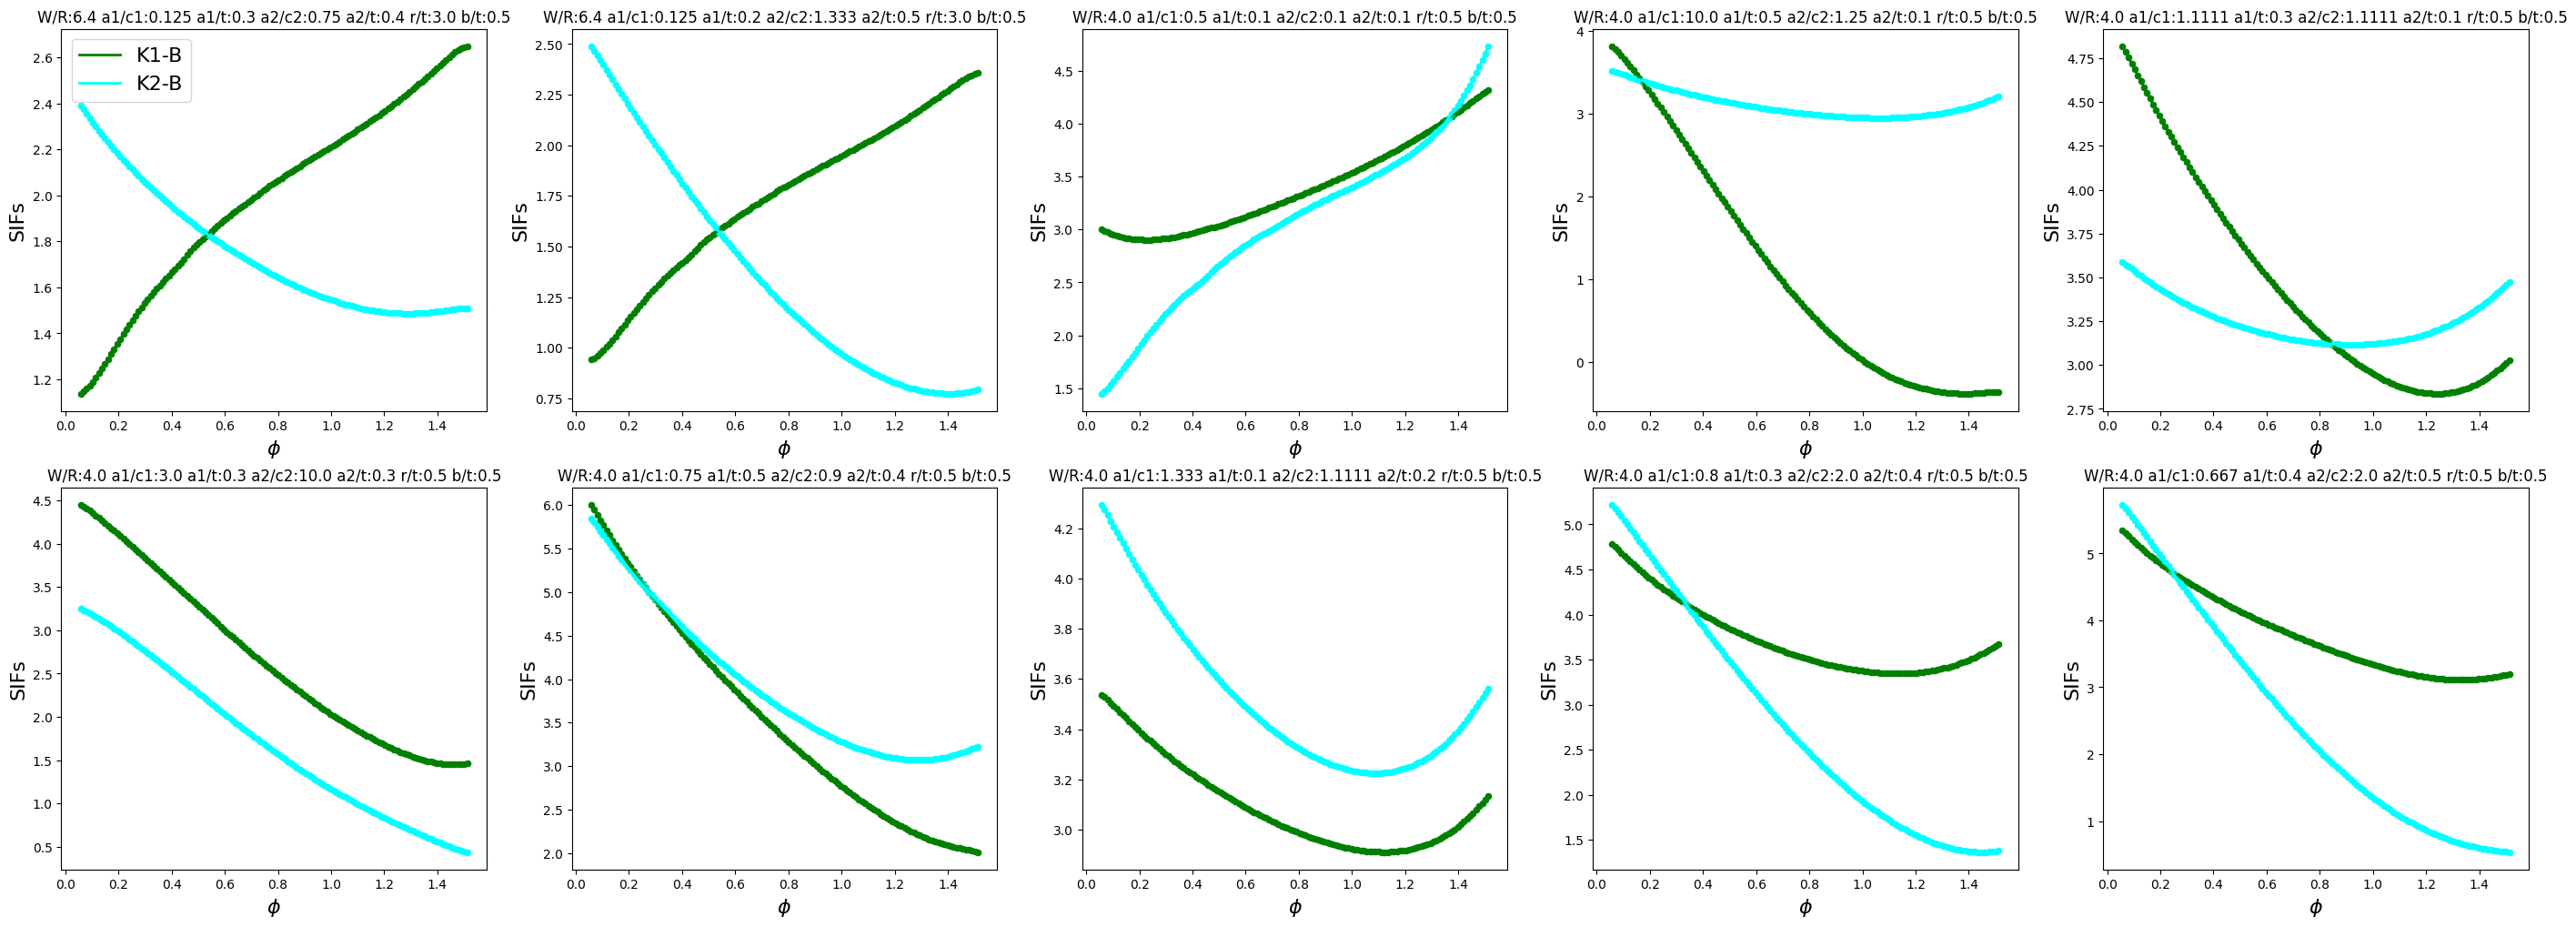

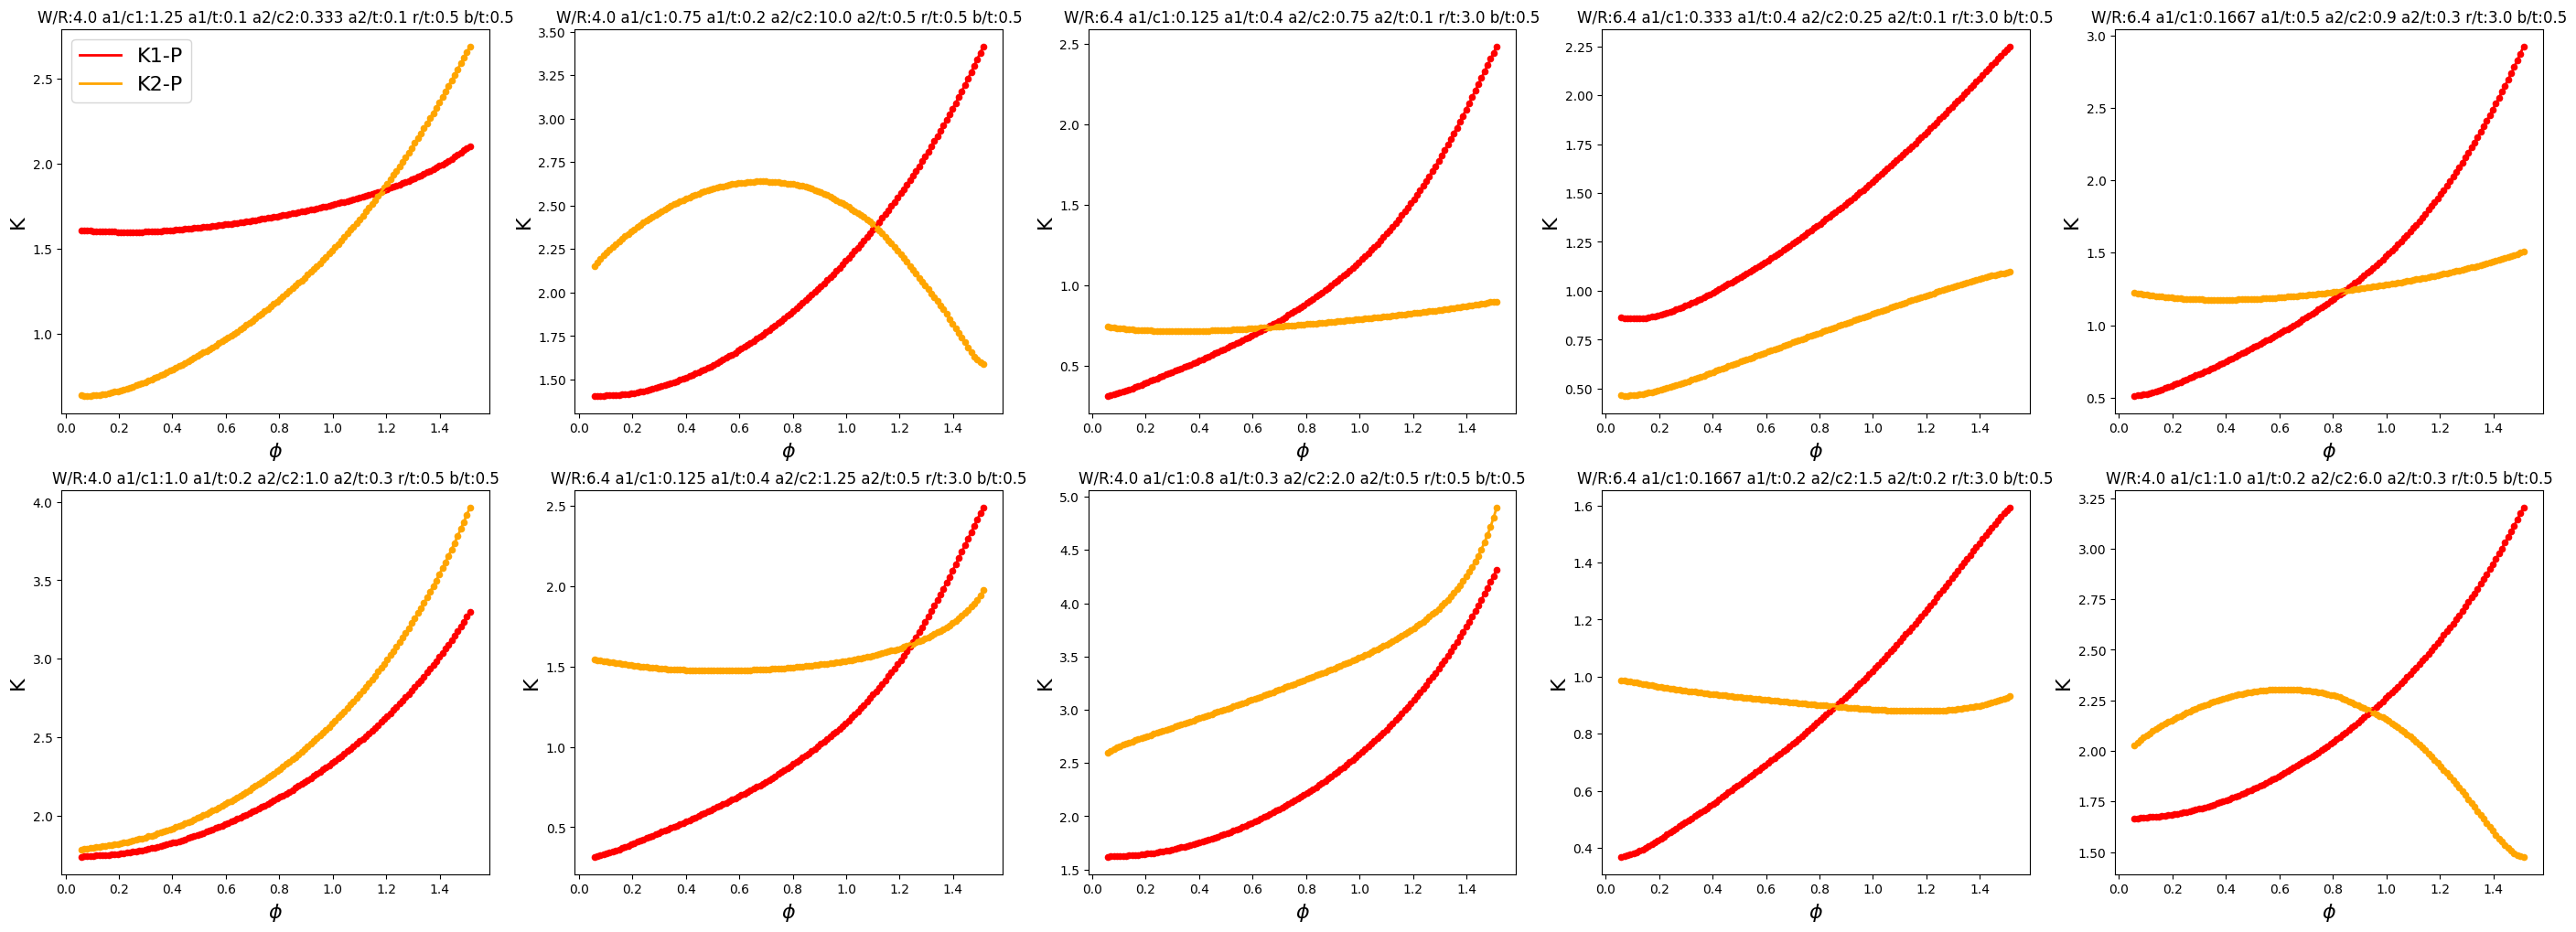

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_5_TEST.csv")
df_test

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,1.0,4.0,0.1,0.1,0.1,0.1,0.5,0.5,0.057913,0.057913,0.718574,0.718574,1.459176,1.459176,0.070448,0.070448
1,1.0,4.0,0.1,0.1,0.1,0.1,0.5,0.5,0.069369,0.069369,0.732137,0.732137,1.482830,1.482830,0.072051,0.072051
2,1.0,4.0,0.1,0.1,0.1,0.1,0.5,0.5,0.080826,0.080826,0.748508,0.748508,1.512661,1.512661,0.073978,0.073978
3,1.0,4.0,0.1,0.1,0.1,0.1,0.5,0.5,0.092282,0.092282,0.766847,0.766847,1.545396,1.545396,0.076152,0.076152
4,1.0,4.0,0.1,0.1,0.1,0.1,0.5,0.5,0.103739,0.103739,0.786669,0.786669,1.580923,1.580923,0.078530,0.078530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789755,9998.0,10.0,10.0,0.5,10.0,0.3,5.0,0.5,1.467061,1.467061,0.901076,0.599629,0.018440,0.149796,0.272504,0.181724
6789756,9998.0,10.0,10.0,0.5,10.0,0.3,5.0,0.5,1.478518,1.478518,0.886607,0.585803,0.017605,0.146120,0.268121,0.177558
6789757,9998.0,10.0,10.0,0.5,10.0,0.3,5.0,0.5,1.489974,1.489974,0.874514,0.573028,0.016891,0.142803,0.264487,0.173671
6789758,9998.0,10.0,10.0,0.5,10.0,0.3,5.0,0.5,1.501431,1.501431,0.864790,0.561543,0.016287,0.139804,0.261574,0.170189


In [7]:
# Get unique combinations of the first four columns
CC_combinations = df_test.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

53045


In [8]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [  2.4   2.6   2.8   3.6   4.    5.2   5.8   6.4   7.   10.   12.   20.
  30.   40.  100. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [0.5 1.  1.5 2.  3.  5. ]
Different b/t values:  [0.5]


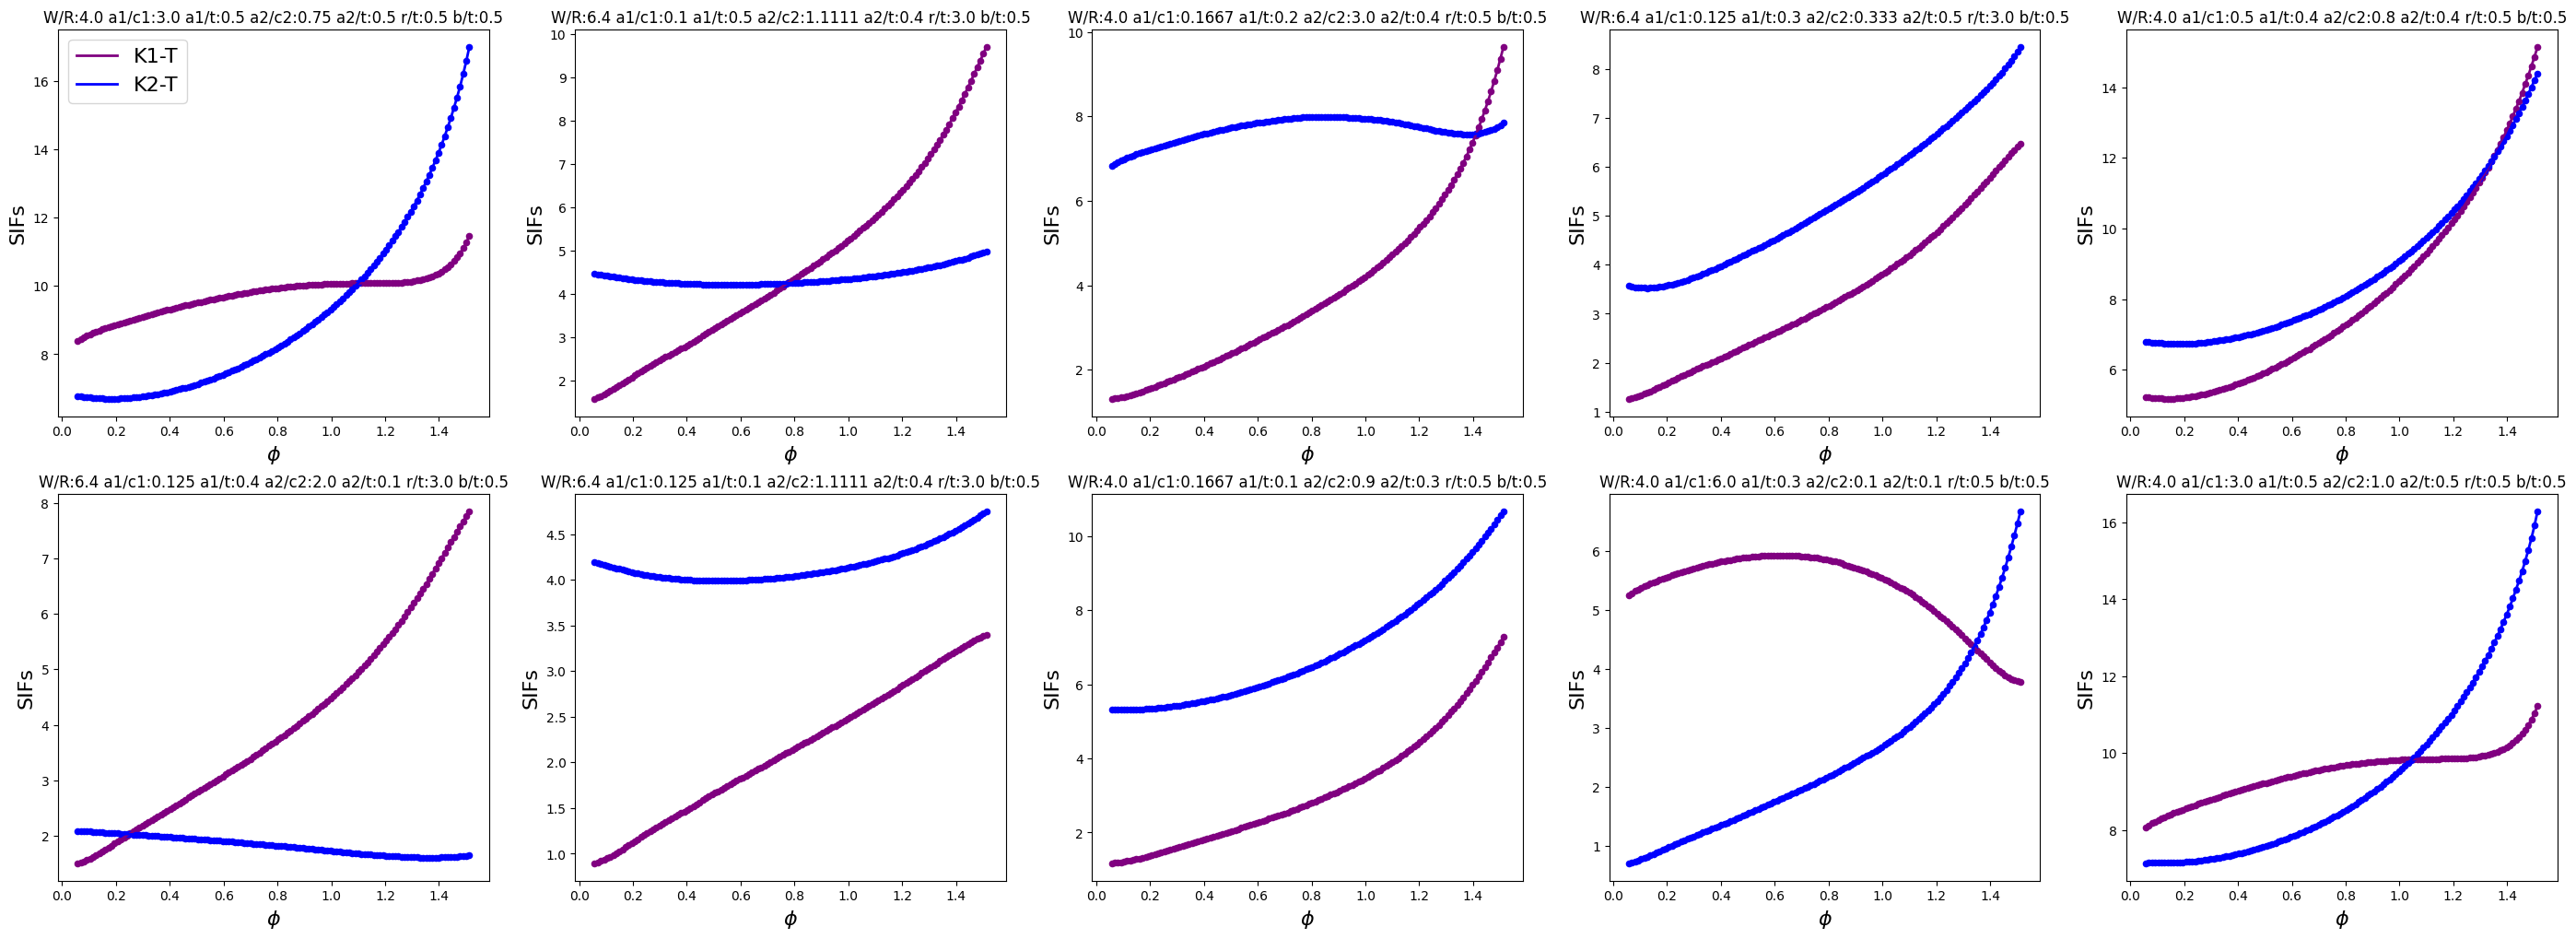

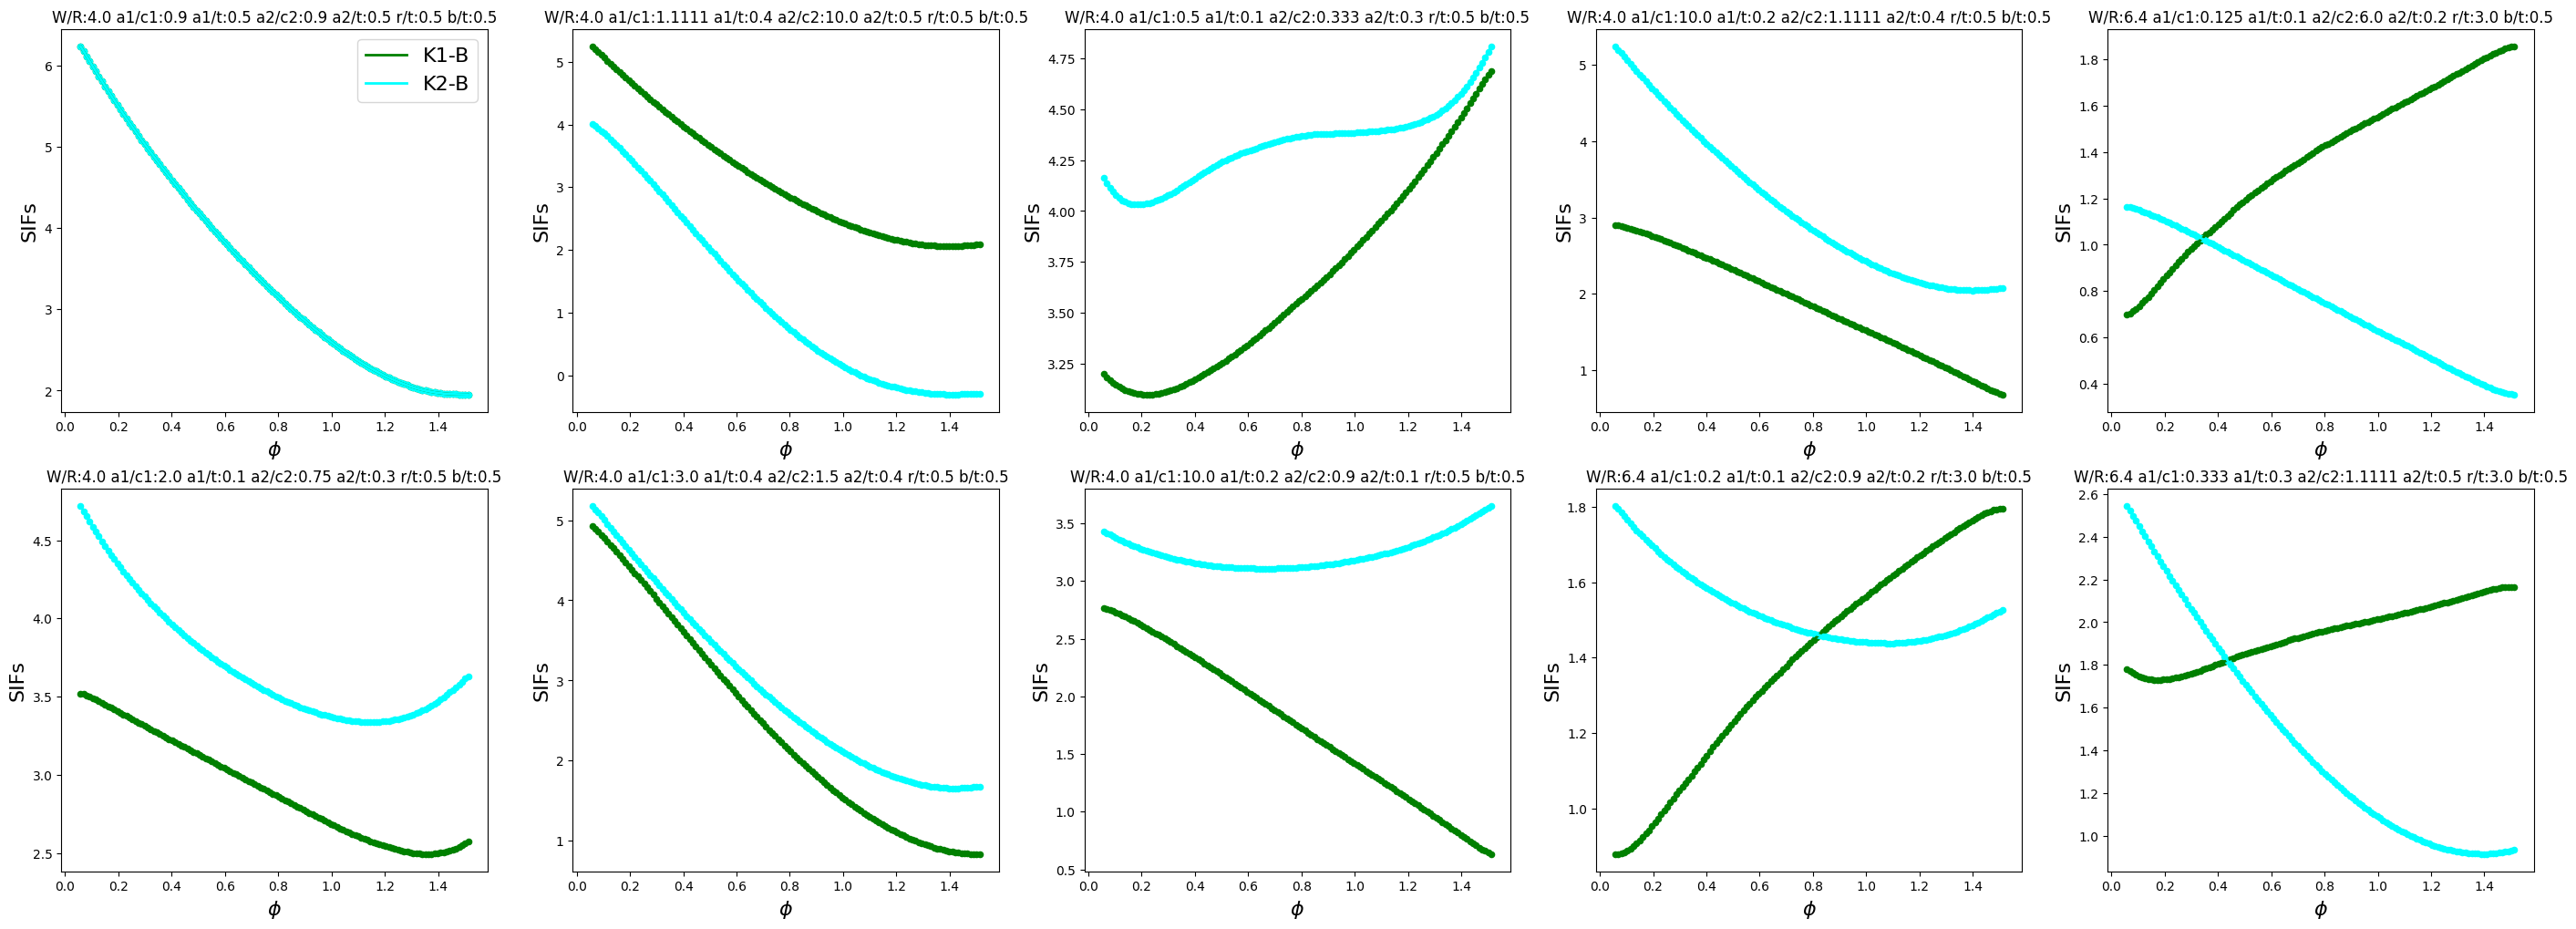

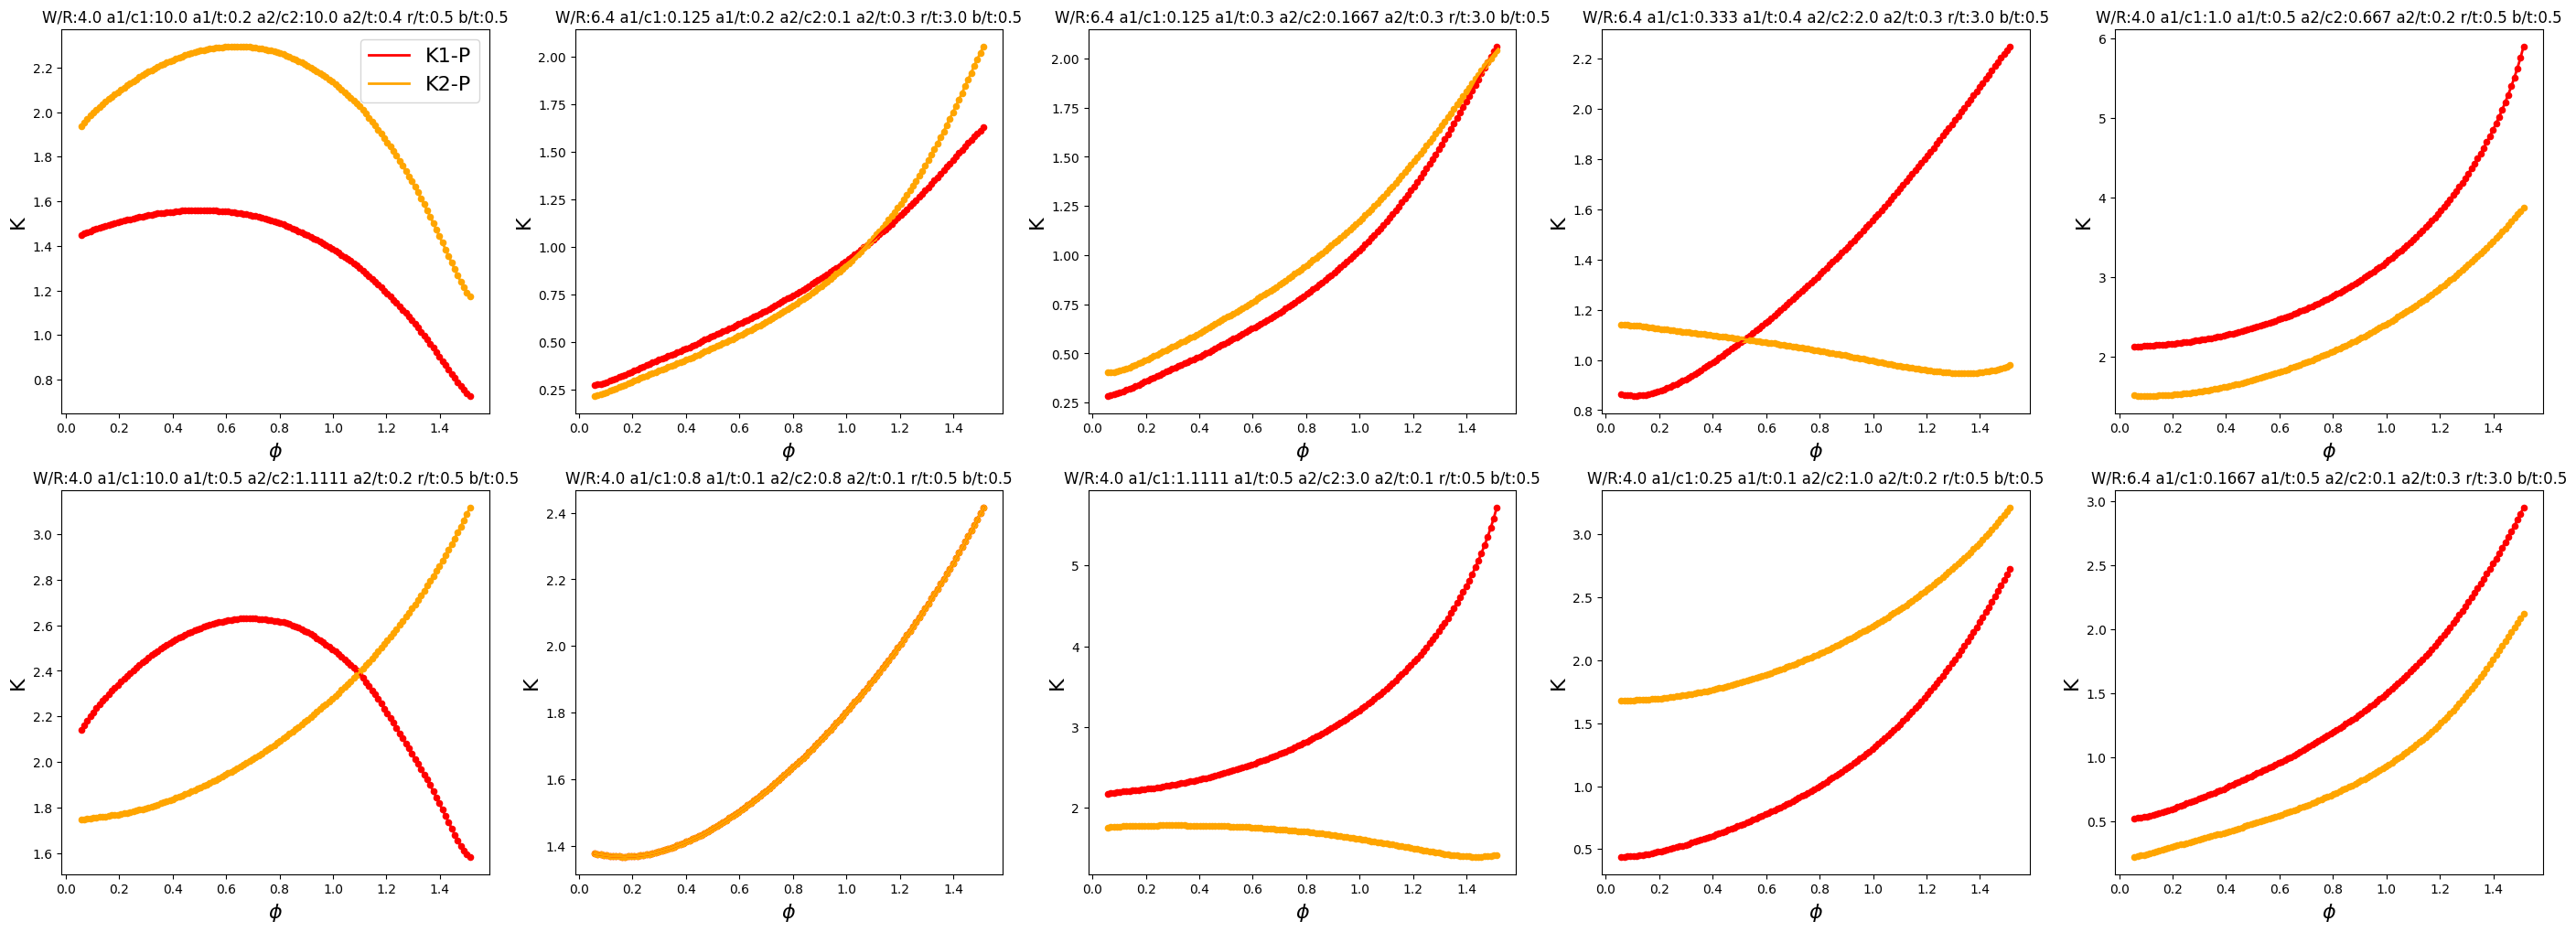

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()